In [1]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError, MeanAbsoluteError
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras

In [2]:
# Creating multiple dataframe with different "look back" periods
# The periods are 1 day, 3 days. 7 days. 15 days. 30 days and 60 days
# The look back periods should be in the form of a list
# For example, if the look back period is 3, then the dataframe should have 3 columns
# Date, Close, [Close(t-1), Close(t-2), Close(t-3)]

def create_look_back_arrays(df, window_size = 1):
    df = df.drop(columns = ['Date'])
    df_as_np = df.to_numpy()
    X = []
    Y = []
    for i in range(len(df_as_np) - window_size):
        X.append(df_as_np[i:i+window_size])
        Y.append(df_as_np[i+window_size])
    return np.array(X), np.array(Y)

In [3]:
df = pd.read_csv('../Data/bitcoin_data.csv')

In [4]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
...,...,...,...,...,...,...,...
2809,2022-05-27,29251.140625,29346.943359,28326.613281,28627.574219,28627.574219,36582005748
2810,2022-05-28,28622.625000,28814.900391,28554.566406,28814.900391,28814.900391,35519577634
2811,2022-05-29,29019.867188,29498.009766,28841.107422,29445.957031,29445.957031,18093886409
2812,2022-05-30,29443.365234,31949.630859,29303.572266,31726.390625,31726.390625,39277993274


In [5]:
df = df[['Date', 'Close']]
scaler = MinMaxScaler()
df['Close'] = scaler.fit_transform(df[['Close']])

/var/folders/76/w363ly_90ln6pf3txlrc64bw0000gn/T/ipykernel_65078/263429702.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Close'] = scaler.fit_transform(df[['Close']])


In [6]:
df

,Date,Close
0,2014-09-17,0.004144
1,2014-09-18,0.003655
2,2014-09-19,0.003216
3,2014-09-20,0.003425
4,2014-09-21,0.003275
...,...,...
2809,2022-05-27,0.422170
2810,2022-05-28,0.424949
2811,2022-05-29,0.434314
2812,2022-05-30,0.468154


In [7]:
lstm_1 = load_model('Models/lstm_1.h5')
lstm_3 = load_model('Models/lstm_3.h5')
lstm_7 = load_model('Models/lstm_7.h5')
lstm_15 = load_model('Models/lstm_15.h5')
lstm_30 = load_model('Models/lstm_30.h5')
lstm_60 = load_model('Models/lstm_60.h5')

gru_1 = load_model('Models/gru_1.h5')
gru_3 = load_model('Models/gru_3.h5')
gru_7 = load_model('Models/gru_7.h5')
gru_15 = load_model('Models/gru_15.h5')
gru_30 = load_model('Models/gru_30.h5')
gru_60 = load_model('Models/gru_60.h5')

In [8]:
# creating a look back window of 60 days 
X, y = create_look_back_arrays(df, 60)

In [9]:
X.shape, y.shape

((2754, 60, 1), (2754, 1))

In [10]:
lstm_1_predictions = []
lstm_3_predictions = []
lstm_7_predictions = []
lstm_15_predictions = []
lstm_30_predictions = []
lstm_60_predictions = []

gru_1_predictions = []
gru_3_predictions = []
gru_7_predictions = []
gru_15_predictions = []
gru_30_predictions = []
gru_60_predictions = []

In [11]:
X.shape

(2754, 60, 1)

In [12]:
X[0], y[0]

(array([[0.00414359],
        [0.00365546],
        [0.00321557],
        [0.00342492],
        [0.0032753 ],
        [0.00332473],
        [0.0038239 ],
        [0.00363714],
        [0.00346454],
        [0.00335845],
        [0.00328567],
        [0.00295417],
        [0.00292874],
        [0.00309905],
        [0.00304965],
        [0.00292288],
        [0.00269198],
        [0.00223721],
        [0.00211322],
        [0.00225521],
        [0.00234585],
        [0.00259445],
        [0.0027738 ],
        [0.0027224 ],
        [0.00273334],
        [0.00297447],
        [0.00315054],
        [0.0033057 ],
        [0.00321523],
        [0.00303393],
        [0.00305177],
        [0.0031658 ],
        [0.00313766],
        [0.00303822],
        [0.00309209],
        [0.00304287],
        [0.00267573],
        [0.00267466],
        [0.00251033],
        [0.00262063],
        [0.00259518],
        [0.00266387],
        [0.00233701],
        [0.00248116],
        [0.00237752],
        [0

In [13]:
X[0][-1].reshape(1, 1)

array([[0.00293862]])

In [14]:
lstm_1.predict(X[0][-1].reshape(1, 1, 1)), y[0]

1/1 [==============================] - 0s 162ms/step


(array([[0.00386051]], dtype=float32), array([0.00311297]))

In [15]:
scaler.inverse_transform(lstm_1.predict(X[0][-1].reshape(1, 1, 1)))

1/1 [==============================] - 0s 10ms/step


array([[438.25754]], dtype=float32)

In [16]:
scaler.inverse_transform(y[0].reshape(1, 1))

array([[387.88198853]])

In [17]:
X[0], X[0, -3:, -1].reshape(-1, 3, 1)

(array([[0.00414359],
        [0.00365546],
        [0.00321557],
        [0.00342492],
        [0.0032753 ],
        [0.00332473],
        [0.0038239 ],
        [0.00363714],
        [0.00346454],
        [0.00335845],
        [0.00328567],
        [0.00295417],
        [0.00292874],
        [0.00309905],
        [0.00304965],
        [0.00292288],
        [0.00269198],
        [0.00223721],
        [0.00211322],
        [0.00225521],
        [0.00234585],
        [0.00259445],
        [0.0027738 ],
        [0.0027224 ],
        [0.00273334],
        [0.00297447],
        [0.00315054],
        [0.0033057 ],
        [0.00321523],
        [0.00303393],
        [0.00305177],
        [0.0031658 ],
        [0.00313766],
        [0.00303822],
        [0.00309209],
        [0.00304287],
        [0.00267573],
        [0.00267466],
        [0.00251033],
        [0.00262063],
        [0.00259518],
        [0.00266387],
        [0.00233701],
        [0.00248116],
        [0.00237752],
        [0

In [18]:
# Creating the list of X for each model.
# Since all the models predict the next day's closing price and have differnet look back windows,
# we'll use the 60 day look back window and extract the look back window for each model
# For example, in the 60 day look back window, if we want to use the 3 day model, we'll use the last 3 days

# Extracting the different look back windows for each model
one_day_window = X[:, -1, -1].reshape(-1, 1, 1)
three_day_window = X[:, -3:, -1].reshape(-1, 3, 1)
seven_day_window = X[:, -7:, -1].reshape(-1, 7, 1)
fifteen_day_window = X[:, -15:, -1].reshape(-1, 15, 1)
thirty_day_window = X[:, -30:, -1].reshape(-1, 30, 1)
sixty_day_window = X[:, :, -1].reshape(-1, 60, 1)

In [19]:
# Predict the prices through the model now
lstm_1_predictions = scaler.inverse_transform(lstm_1.predict(one_day_window))
lstm_3_predictions = scaler.inverse_transform(lstm_3.predict(three_day_window))
lstm_7_predictions = scaler.inverse_transform(lstm_7.predict(seven_day_window))
lstm_15_predictions = scaler.inverse_transform(lstm_15.predict(fifteen_day_window))
lstm_30_predictions = scaler.inverse_transform(lstm_30.predict(thirty_day_window))
lstm_60_predictions = scaler.inverse_transform(lstm_60.predict(sixty_day_window))

gru_1_predictions = scaler.inverse_transform(gru_1.predict(one_day_window))
gru_3_predictions = scaler.inverse_transform(gru_3.predict(three_day_window))
gru_7_predictions = scaler.inverse_transform(gru_7.predict(seven_day_window))
gru_15_predictions = scaler.inverse_transform(gru_15.predict(fifteen_day_window))
gru_30_predictions = scaler.inverse_transform(gru_30.predict(thirty_day_window))
gru_60_predictions = scaler.inverse_transform(gru_60.predict(sixty_day_window))

87/87 [==============================] - 0s 2ms/step


In [20]:
lstm_1_predictions.shape, lstm_3_predictions.shape, lstm_7_predictions.shape, lstm_15_predictions.shape, lstm_30_predictions.shape, lstm_60_predictions.shape

((2754, 1), (2754, 1), (2754, 1), (2754, 1), (2754, 1), (2754, 1))

In [21]:
gru_1_predictions.shape, gru_3_predictions.shape, gru_7_predictions.shape, gru_15_predictions.shape, gru_30_predictions.shape, gru_60_predictions.shape

((2754, 1), (2754, 1), (2754, 1), (2754, 1), (2754, 1), (2754, 1))

In [22]:
y.shape

(2754, 1)

In [23]:
# Creating a dataframe with all the predictions and the actual values
predictions_df = pd.DataFrame({'Actual': scaler.inverse_transform(y.reshape(-1, 1)).reshape(-1), 
                               'LSTM_1': lstm_1_predictions.reshape(-1), 
                               'LSTM_3': lstm_3_predictions.reshape(-1),
                               'LSTM_7': lstm_7_predictions.reshape(-1),
                               'LSTM_15': lstm_15_predictions.reshape(-1),
                               'LSTM_30': lstm_30_predictions.reshape(-1),
                               'LSTM_60': lstm_60_predictions.reshape(-1),
                               'GRU_1': gru_1_predictions.reshape(-1),
                               'GRU_3': gru_3_predictions.reshape(-1),
                               'GRU_7': gru_7_predictions.reshape(-1),
                               'GRU_15': gru_15_predictions.reshape(-1),
                               'GRU_30': gru_30_predictions.reshape(-1),
                               'GRU_60': gru_60_predictions.reshape(-1)}, index = df['Date'][60:])

In [24]:
predictions_df

,Actual,LSTM_1,LSTM_3,LSTM_7,LSTM_15,LSTM_30,LSTM_60,GRU_1,GRU_3,GRU_7,GRU_15,GRU_30,GRU_60
Date,,,,,,,,,,,,,
2014-11-16,387.881989,438.257782,463.300049,468.583588,483.775177,376.525146,386.010925,393.818207,395.499664,472.643768,397.844879,463.392731,236.958420
2014-11-17,387.407990,449.921722,450.377655,471.401550,492.050537,377.593597,392.481537,405.584839,382.999298,471.508179,401.989960,474.422272,248.737457
2014-11-18,375.197998,449.454285,445.770264,473.255402,493.168427,378.403137,394.099762,405.110107,379.774506,471.031830,402.231110,473.914612,247.647049
2014-11-19,380.554993,437.329407,446.881866,473.089996,482.341980,370.233063,384.226776,392.878815,380.174194,462.985901,396.983856,461.695740,235.178772
2014-11-20,357.839996,442.649017,444.076477,467.116394,485.646576,371.497772,386.776855,398.246124,377.030975,463.840454,398.837036,466.720428,240.772751
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-27,28627.574219,23869.228516,26447.271484,29051.880859,29781.492188,29424.837891,29492.935547,22511.603516,26257.433594,29257.234375,29643.275391,29576.158203,29342.843750
2022-05-28,28814.900391,23510.755859,26210.107422,28966.708984,29062.671875,28817.962891,28786.363281,22246.046875,26034.621094,28814.744141,28992.828125,28933.117188,28672.753906
2022-05-29,29445.957031,23615.677734,25980.800781,28862.097656,29431.060547,28866.087891,29182.013672,22323.818359,25788.228516,28732.650391,29171.945312,29159.105469,28954.982422


# CNN Meta Model

In [25]:
scaler = MinMaxScaler()
predictions_df['Actual'] = scaler.fit_transform(predictions_df[['Actual']])
predictions_df['LSTM_1'] = scaler.fit_transform(predictions_df[['LSTM_1']])
predictions_df['LSTM_3'] = scaler.fit_transform(predictions_df[['LSTM_3']])
predictions_df['LSTM_7'] = scaler.fit_transform(predictions_df[['LSTM_7']])
predictions_df['LSTM_15'] = scaler.fit_transform(predictions_df[['LSTM_15']])
predictions_df['LSTM_30'] = scaler.fit_transform(predictions_df[['LSTM_30']])
predictions_df['LSTM_60'] = scaler.fit_transform(predictions_df[['LSTM_60']])
predictions_df['GRU_1'] = scaler.fit_transform(predictions_df[['GRU_1']])
predictions_df['GRU_3'] = scaler.fit_transform(predictions_df[['GRU_3']])
predictions_df['GRU_7'] = scaler.fit_transform(predictions_df[['GRU_7']])
predictions_df['GRU_15'] = scaler.fit_transform(predictions_df[['GRU_15']])
predictions_df['GRU_30'] = scaler.fit_transform(predictions_df[['GRU_30']])
predictions_df['GRU_60'] = scaler.fit_transform(predictions_df[['GRU_60']])

predictions_df = predictions_df[['Actual', 'LSTM_30', 'LSTM_60', 'GRU_30', 'GRU_60']]

In [26]:
predictions_df

,Actual,LSTM_30,LSTM_60,GRU_30,GRU_60
Date,,,,,
2014-11-16,0.003113,0.002922,0.003192,0.002017,0.003146
2014-11-17,0.003106,0.002938,0.003295,0.002183,0.003328
2014-11-18,0.002925,0.002950,0.003321,0.002175,0.003311
2014-11-19,0.003004,0.002828,0.003164,0.001991,0.003119
2014-11-20,0.002667,0.002847,0.003204,0.002067,0.003205
...,...,...,...,...,...
2022-05-27,0.422170,0.439123,0.465903,0.440063,0.452504
2022-05-28,0.424949,0.430010,0.454671,0.430387,0.442159
2022-05-29,0.434314,0.430732,0.460960,0.433788,0.446516


Creating a LSTM meta model to predict the next day's closing price.
The meta model will use the predictions of the other models as features

In [27]:
meta_training_X =  predictions_df.iloc[:int(len(predictions_df) * 0.8)].drop(columns = ['Actual'])
meta_training_y = predictions_df.iloc[:int(len(predictions_df) * 0.8)]['Actual']

meta_validation_X = predictions_df.iloc[int(len(predictions_df) * 0.8):int(len(predictions_df) * 0.9)].drop(columns = ['Actual'])
meta_validation_y = predictions_df.iloc[int(len(predictions_df) * 0.8):int(len(predictions_df) * 0.9)]['Actual']

meta_testing_X = predictions_df.iloc[int(len(predictions_df) * 0.9):].drop(columns = ['Actual'])
meta_testing_y = predictions_df.iloc[int(len(predictions_df) * 0.9):]['Actual']

In [28]:
meta_training_X.shape, meta_training_y.shape, meta_validation_X.shape, meta_validation_y.shape, meta_testing_X.shape, meta_testing_y.shape

((2203, 4), (2203,), (275, 4), (275,), (276, 4), (276,))

In [29]:
meta_training_X

,LSTM_30,LSTM_60,GRU_30,GRU_60
Date,,,,
2014-11-16,0.002922,0.003192,0.002017,0.003146
2014-11-17,0.002938,0.003295,0.002183,0.003328
2014-11-18,0.002950,0.003321,0.002175,0.003311
2014-11-19,0.002828,0.003164,0.001991,0.003119
2014-11-20,0.002847,0.003204,0.002067,0.003205
...,...,...,...,...
2020-11-22,0.281139,0.301442,0.281459,0.289525
2020-11-23,0.277905,0.296375,0.277298,0.285215
2020-11-24,0.276642,0.296614,0.277357,0.285440


In [30]:
# The entire row is the input for the meta model
# reshape the input to be 3D [length, 12, 1]
meta_training_X = meta_training_X.to_numpy().reshape(-1, 4, 1)
meta_validation_X = meta_validation_X.to_numpy().reshape(-1, 4, 1)
meta_testing_X = meta_testing_X.to_numpy().reshape(-1, 4, 1)

meta_training_X.shape, meta_validation_X.shape, meta_testing_X.shape

((2203, 4, 1), (275, 4, 1), (276, 4, 1))

In [31]:
meta_training_X[0]

array([[0.00292209],
       [0.00319214],
       [0.00201664],
       [0.00314612]], dtype=float32)

In [32]:
meta_training_y = meta_training_y.to_numpy().reshape(-1, 1)
meta_validation_y = meta_validation_y.to_numpy().reshape(-1, 1)
meta_testing_y = meta_testing_y.to_numpy().reshape(-1, 1)

meta_training_y.shape, meta_validation_y.shape, meta_testing_y.shape

((2203, 1), (275, 1), (276, 1))

In [33]:
meta_training_y[0]

array([0.00311297])

In [34]:
# Create a CNN meta model that will take the input of the predictions of the other models
# The input shape is (6, 1) and the output shape is (1, 1)

meta_model = keras.Sequential([
    keras.layers.Conv1D(filters = 128, kernel_size = 2, activation = 'ReLU', input_shape = (4, 1)),
    keras.layers.MaxPooling1D(pool_size = 2),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation = 'ReLU'),
    keras.layers.Dense(1, activation = 'linear')
])

meta_model.compile(optimizer = Adam(learning_rate=0.005), loss = 'mse', metrics = ['mae', 'mse'])

In [35]:
meta_model.fit(meta_training_X, meta_training_y, epochs = 200, validation_data = (meta_validation_X, meta_validation_y), batch_size = 16)

Epoch 1/200
138/138 [==============================] - 0s 1ms/step - loss: 3.9237e-04 - mae: 0.0089 - mse: 3.9237e-04 - val_loss: 0.0011 - val_mae: 0.0252 - val_mse: 0.0011
Epoch 2/200
138/138 [==============================] - 0s 586us/step - loss: 3.1467e-05 - mae: 0.0037 - mse: 3.1467e-05 - val_loss: 9.9640e-04 - val_mae: 0.0235 - val_mse: 9.9640e-04
Epoch 3/200
138/138 [==============================] - 0s 597us/step - loss: 2.9644e-05 - mae: 0.0037 - mse: 2.9644e-05 - val_loss: 0.0016 - val_mae: 0.0308 - val_mse: 0.0016
Epoch 4/200
138/138 [==============================] - 0s 580us/step - loss: 2.9887e-05 - mae: 0.0035 - mse: 2.9887e-05 - val_loss: 0.0044 - val_mae: 0.0563 - val_mse: 0.0044
Epoch 5/200
138/138 [==============================] - 0s 592us/step - loss: 2.8377e-05 - mae: 0.0035 - mse: 2.8377e-05 - val_loss: 0.0013 - val_mae: 0.0277 - val_mse: 0.0013
Epoch 6/200
138/138 [==============================] - 0s 582us/step - loss: 2.9023e-05 - mae: 0.0035 - mse: 2.9023e-05

In [36]:
test_predictions = meta_model.predict(meta_testing_X)
test_results = pd.DataFrame({'Actual': meta_testing_y.flatten(), 'Predicted': test_predictions.flatten()})
test_results

9/9 [==============================] - 0s 461us/step


,Actual,Predicted
0,0.721957,0.713514
1,0.695619,0.713781
2,0.697277,0.683523
3,0.722212,0.692824
4,0.729345,0.718875
...,...,...
271,0.422170,0.436324
272,0.424949,0.426425
273,0.434314,0.430671
274,0.468154,0.440864


In [37]:
# unscale the data to get the actual values
test_results['Actual'] = scaler.inverse_transform(test_results[['Actual']])
test_results['Predicted'] = scaler.inverse_transform(test_results[['Predicted']])


In [38]:
test_results

,Actual,Predicted
0,46795.819428,46248.996094
1,45089.886948,46266.246094
2,45197.252777,44306.414062
3,46812.347067,44908.816406
4,47274.377565,46596.250000
...,...,...
271,27377.990726,28294.802734
272,27558.043250,27653.591797
273,28164.596729,27928.666016
274,30356.483858,28588.837891


In [39]:
test_results.index = df[60:]['Date'][int(len(predictions_df) * 0.9):].to_list()

In [40]:
test_results

,Actual,Predicted
2021-08-29,46795.819428,46248.996094
2021-08-30,45089.886948,46266.246094
2021-08-31,45197.252777,44306.414062
2021-09-01,46812.347067,44908.816406
2021-09-02,47274.377565,46596.250000
...,...,...
2022-05-27,27377.990726,28294.802734
2022-05-28,27558.043250,27653.591797
2022-05-29,28164.596729,27928.666016
2022-05-30,30356.483858,28588.837891


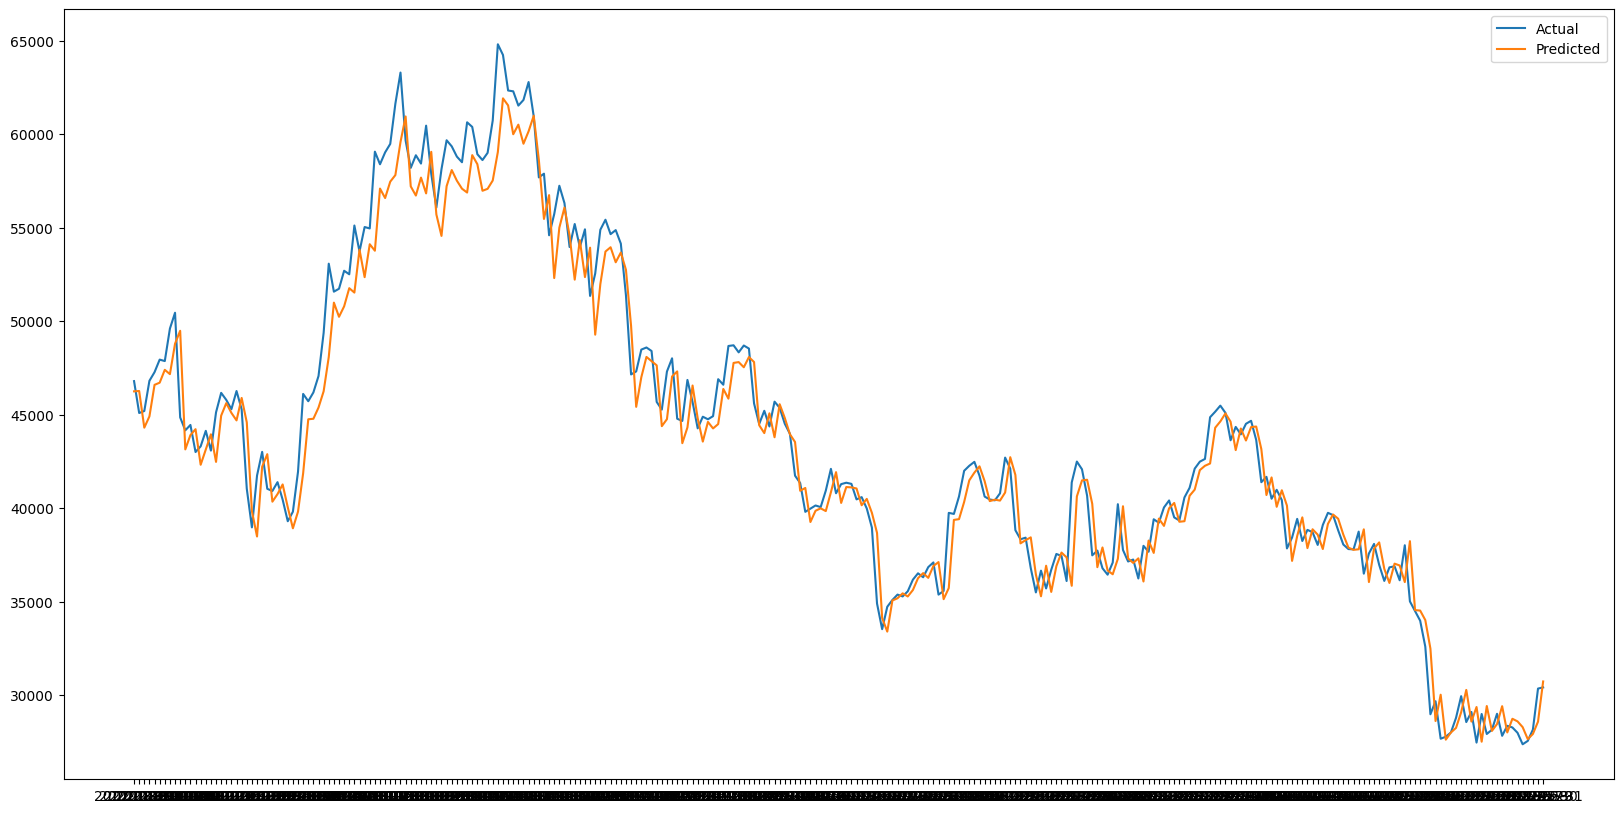

In [41]:
# Plotting the results
plt.figure(figsize = (20, 10))
plt.plot(test_results['Actual'], label = 'Actual')
plt.plot(test_results['Predicted'], label = 'Predicted')
plt.legend()

In [42]:
rmse = np.sqrt(np.mean((test_results['Actual'] - test_results['Predicted']) ** 2))
mae = np.mean(np.abs(test_results['Actual'] - test_results['Predicted']))
print(f'RMSE: {rmse}, MAE: {mae}')

RMSE: 1681.6715365870552, MAE: 1279.4396268103444
